# NNTI Assignment 3

Name 1: Sayeh Jarollahi <br>
Student id 1: 7073520 <br>
Email 1: saja00006@stud.uni-saarland.de <br>

Name 2: Mahsa Amani <br>
Student id 2: 7064006 <br>
Email 2: maam00002@stud.uni-saarland.de <br>


**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective  files for any additional exercises necessary. There is no need to resubmit the data files should they be provided separately. <br>


Upload the zipped folder on CMS. Please follow the naming convention of **Name1_id1_Name2_id2_Name3_id3.zip **. Only one member of the group should make the submisssion.


Linear Regression is a useful method to know of, but it can only model linear relationships. The problem is that real world datasets can have a lot of non-linear relationships as well. In such cases, non-linear methods are used, one such method is **polynomial regression**.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### a. Data loading: Load the data from the files `X.npy` and `y.npy` and visualize them. [1 point]


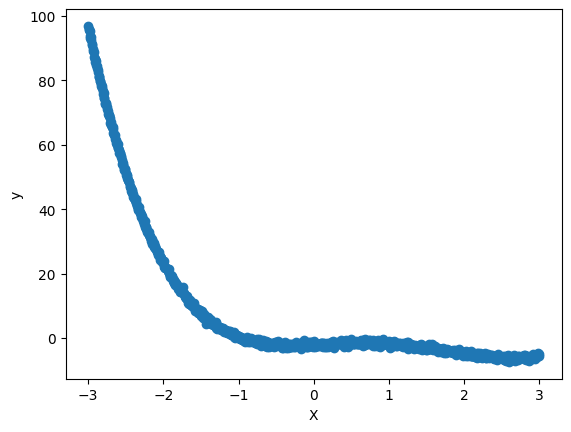

In [5]:
# Load the data
X = np.load("X.npy")
y = np.load("y.npy")

# Plot the data
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
X.shape, y.shape

((1000, 1), (1000, 1))

### b. Regression Models: [0.5+1+0.5 points]

i. Build a [Linear Regression](https://scikit-learn.org/1.5/modules/linear_model.html) model on the provided dataset. Calculate and print the RMSE for this model.

ii. Using the given list of polynomial degrees, build [Polynomial Regression](https://scikit-learn.org/1.5/modules/preprocessing.html#generating-polynomial-features) models on the given dataset for each degree and print the RMSE.

iii. Save the predictions for each model (Linear and different versions of  Polynomial) and create a plot to visualize the predictions against the actual data points.


In [50]:
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 15.293374352668407


/Users/mahsaamani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
y_preds_per_model = {"Linear model": y_pred}

In [52]:
degrees = [2, 3, 4] # Polynomial Regression for different degrees
for degree in degrees:
    # Create polynomial features and fit X to them
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)  
    # Create the model
    model = LinearRegression()  
    # Fit the model to the data
    model.fit(X_poly, y)
    # Get Predictions
    y_pred = model.predict(X_poly)
    # Save the predictions for plotting
    y_preds_per_model[f"Polynomial model, Degree {degree}"] = y_pred
    # Calculate RMSE
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f"Degree {degree}: RMSE = {rmse}")

Degree 2: RMSE = 8.743763105062023
Degree 3: RMSE = 3.101353771070473
Degree 4: RMSE = 0.4875757874095821


/Users/mahsaamani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mahsaamani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mahsaamani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


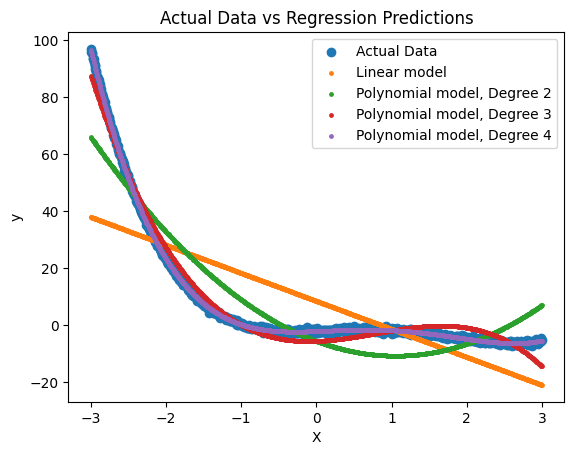

In [55]:
# Print summary of RMSE scores
plt.scatter(x=X, y=y, label="Actual Data")
for model, y_pred in y_preds_per_model.items():
    plt.scatter(x=X, y=y_pred, label=model, s=6)
plt.title('Actual Data vs Regression Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()